In [42]:
# importing necessary libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [3]:
# extracting and preprocessing data
import os

filenames = os.listdir('DVCData/train')
labels = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        labels.append(str(1))
    else:
        labels.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

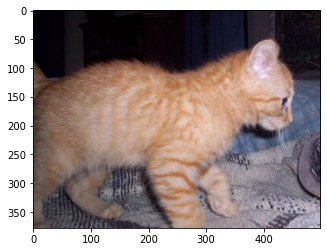

cat.12038.jpg


In [4]:
#visualizing a random data
sample = random.choice(filenames)
image = load_img("DVCData/train/"+sample)
plt.imshow(image)
plt.show()
print(sample)

In [5]:
# splitting the training data into training and validation

train_data, val_data = train_test_split(df, test_size=0.2, random_state = 42)
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)

# print(train_data['label'].value_counts())
# print(val_data['label'].value_counts())

In [6]:
# generating and augmentating training and validation data through ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_data_gen.flow_from_dataframe(
    train_data, 
    "DVCData/train/", 
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode='binary',
    batch_size=20
)

val_data_gen = ImageDataGenerator(rescale=1./255)

val_generator = val_data_gen.flow_from_dataframe(val_data, 
    "DVCData/train/", 
    x_col='filename',
    y_col='label',
    target_size=(128,128),
    class_mode='binary',
    batch_size=20
)

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [7]:
# defining the model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, input_shape = (128,128,3), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=3, padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=3, padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9

In [62]:
hmodel = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=6, verbose=1, validation_data=val_generator, validation_steps=STEP_SIZE_VALID)

Epoch 1/6
1000/1000 [==============================] - 481s 479ms/step - loss: 0.6900 - binary_accuracy: 0.5326 - val_loss: 0.6290 - val_binary_accuracy: 0.6552
Epoch 2/6
1000/1000 [==============================] - 413s 413ms/step - loss: 0.6287 - binary_accuracy: 0.6489 - val_loss: 0.5540 - val_binary_accuracy: 0.7296
Epoch 3/6
1000/1000 [==============================] - 413s 413ms/step - loss: 0.5714 - binary_accuracy: 0.7091 - val_loss: 0.5210 - val_binary_accuracy: 0.7400
Epoch 4/6
1000/1000 [==============================] - 389s 388ms/step - loss: 0.5360 - binary_accuracy: 0.7387 - val_loss: 0.4605 - val_binary_accuracy: 0.7822
Epoch 5/6
1000/1000 [==============================] - 394s 394ms/step - loss: 0.5234 - binary_accuracy: 0.7455 - val_loss: 0.4570 - val_binary_accuracy: 0.7842
Epoch 6/6
1000/1000 [==============================] - 391s 391ms/step - loss: 0.4997 - binary_accuracy: 0.7603 - val_loss: 0.4470 - val_binary_accuracy: 0.7850


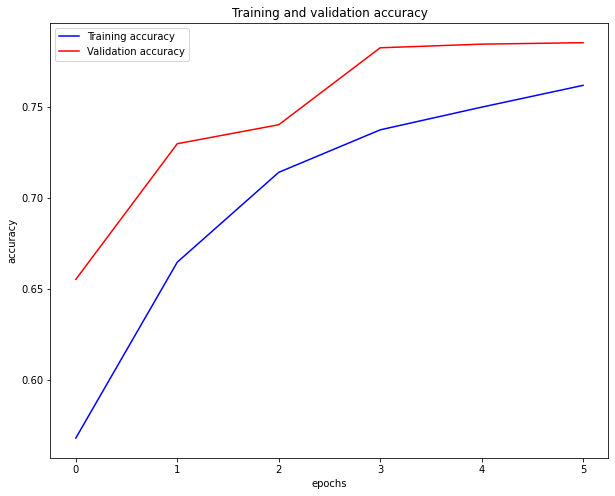

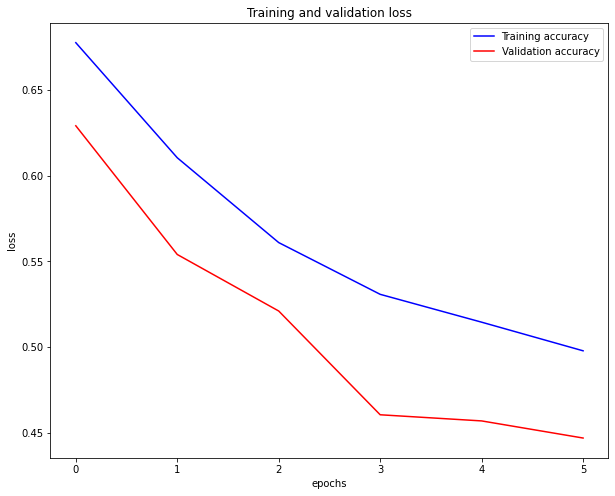

In [63]:
# code to show the training and validation output for Gender model.

accuracy = hmodel.history['binary_accuracy']
val_accuracy = hmodel.history['val_binary_accuracy']
loss = hmodel.history['loss']
val_loss = hmodel.history['val_loss']
epochs = range(len(accuracy))

fig = plt.figure(figsize=(10,8)) 
plt.plot(epochs, accuracy, 'b', label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
# txt = "Fig 1.b : "               # captioning the figure
# fig.text(.5, .05, txt, ha='center')
plt.legend()
plt.show()


fig = plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'b', label = 'Training accuracy')
plt.plot(epochs,val_loss,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [24]:
# model.save('dogvscat.model')
model = load_model('dogvscat.model')
print("Info:: {'Cat' = 0, 'Dog'= 1}")

Info:: {'Cat' = 0, 'Dog'= 1}


In [25]:
# code to test DogVsCat classfication model

# creating test generator to test the model
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'DVCTestData/test/',
    target_size=(128, 128),
    class_mode=None,
    shuffle=False,
    batch_size=50,
)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# test_generator.reset()
# model.evaluate_generator(generator=valid_generator,
# steps=STEP_SIZE_VALID)

Found 500 images belonging to 2 classes.


In [26]:
#predicting output label for test dataset
pred = model.predict(test_generator, steps=STEP_SIZE_TEST, verbose=1)

# converting the predicted output data and getting desired ouput
animal_pred = [ (1 if y[0] > 0.5 else 0) for y in pred]
animal_desired = test_generator.classes
# animal_desired = test_generator.class_indices
# # labels = (train_generator.class_indices)
# # labels = dict((v,k) for k,v in labels.items())
# # predictions = [labels[k] for k in y_pred]

# saving the predicted output in a text file
examplenames = test_generator.filenames
results = pd.DataFrame({"Filenames":examplenames, "Desired Output": animal_desired, "Predicted Output": animal_pred})
results.to_csv("animal_prediction.txt", header= False, index= False, sep =' ')

accuracy = accuracy_score(animal_desired,animal_pred)   
print("Accuracy of DogVsCat Model: " + str((accuracy *100))+ " %.")

10/10 [==============================] - 2s 200ms/step
Accuracy of DogVsCat Model: 78.4 %.


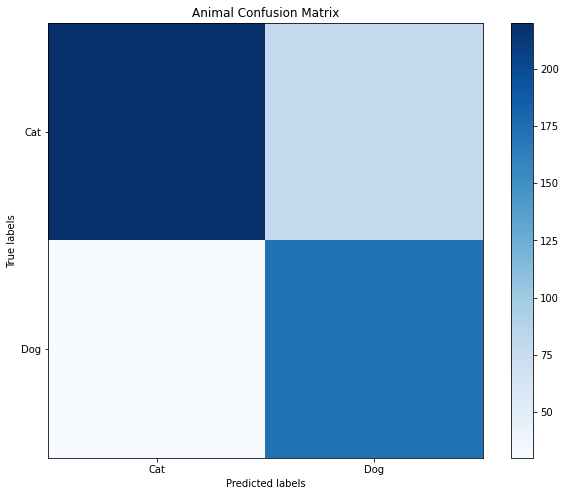

In [29]:
# Code block to print the Gender Confusion Matrix.



fig = plt.figure(figsize=(10, 8))
animal_confusion_matrix = confusion_matrix(animal_pred, animal_desired)
# print(animal_confusion_matrix)

plt.imshow(animal_confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.yticks([0, 1], ['Cat', 'Dog'])
plt.title('Animal Confusion Matrix')
plt.colorbar()
plt.show()

In [40]:
# code to test DogVsCat classfication model

#creating dataframe for the random test
random_filenames = os.listdir('DVCTestData/random_test\/')
random_df = pd.DataFrame({ 'filename': random_filenames })
# print(random_df)

# creating test generator to test the model
random_test_datagen = ImageDataGenerator(rescale=1./255)

random_test_generator = random_test_datagen.flow_from_dataframe(
    random_df,
    'DVCTestData/random_test/',
    x_col='filename',
    target_size=(128, 128),
    class_mode=None,
    shuffle=False,
    batch_size=1,
)

STEP_SIZE_TEST=random_test_generator.n//random_test_generator.batch_size
# random_test_generator.reset()

#predicting output label for random test dataset
pred = model.predict(random_test_generator, steps=STEP_SIZE_TEST, verbose=1)

# converting the predicted output data and getting desired ouput
random_animal_pred = [ (1 if y[0] > 0.5 else 0) for y in pred]

examplenames = random_test_generator.filenames
predictions = pd.DataFrame({"Filenames":examplenames, "Predicted Output": random_animal_pred})

Found 20 validated image filenames.
20/20 [==============================] - 0s 7ms/step


In [45]:
unique, counts = np.unique(random_animal_pred, return_counts=True)
result = dict(zip(unique, counts))
print(result)
print(predictions)

{0: 10, 1: 10}
           Filenames  Predicted Output
0     fox_000038.jpg                 0
1     fox_000039.jpg                 0
2     fox_000040.jpg                 0
3     fox_000046.jpg                 1
4     fox_000053.jpg                 1
5     leo_000286.jpg                 0
6     leo_000302.jpg                 0
7     leo_000306.jpg                 0
8     leo_000314.jpg                 0
9     leo_000354.jpg                 1
10   lion_001250.jpg                 0
11   lion_001251.jpg                 1
12   lion_001253.jpg                 1
13   lion_001258.jpg                 1
14   lion_001275.jpg                 0
15  tiger_000898.jpg                 1
16  tiger_000923.jpg                 1
17  tiger_000929.jpg                 0
18  tiger_000932.jpg                 1
19  tiger_000942.jpg                 1
